In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman' 

In [3]:
dir_ls1 = [
    "/data4/nakao/AdaptiveFEM/work/work_5000_1/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_2/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_3/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_4/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_5/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_6/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_7/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_8/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_9/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_10/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_11/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_12/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_13/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_14/",
    "/data4/nakao/AdaptiveFEM/work/work_5000_15/",
]
dir_ls2 = [
    "/data4/nakao/AdaptiveFEM/work/work_2500_1/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_2/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_3/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_4/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_5/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_6/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_7/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_8/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_9/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_10/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_11/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_12/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_13/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_14/",
    "/data4/nakao/AdaptiveFEM/work/work_2500_15/",
]
dir_ls3 = [
    "/data4/nakao/AdaptiveFEM/work/work_1250_1/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_2/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_3/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_4/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_5/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_6/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_7/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_8/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_9/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_10/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_11/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_12/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_13/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_14/",
    "/data4/nakao/AdaptiveFEM/work/work_1250_15/",
]
dir_ls4 = [
    "/data4/nakao/AdaptiveFEM/work/work_625_1/",
    "/data4/nakao/AdaptiveFEM/work/work_625_2/",
    "/data4/nakao/AdaptiveFEM/work/work_625_3/",
    "/data4/nakao/AdaptiveFEM/work/work_625_4/",
    "/data4/nakao/AdaptiveFEM/work/work_625_5/",
    "/data4/nakao/AdaptiveFEM/work/work_625_6/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_7/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_8/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_9/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_10/",
    # "/data4/nakao/AdaptiveFEM/work/work_625_11/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_12/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_13/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_14/",
    # "/data4/nakao/AdaptiveFEM/work/work_1250_15/",
]

# label_ls = [
#     "initial element size 5km",
#     "initial element size 2.5km",
#     "initial element size 1.25km",
#     "initial element size 0.625km",
# ]
# dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3, dir_ls4]
label_ls = [
    "initial element size 5km",
    "initial element size 2.5km",
    "initial element size 1.25km",
]
dir_ls_arr = [dir_ls1, dir_ls2, dir_ls3]
# label_ls = [
#     "initial element size 1.25km"
# ]
# dir_ls_arr = [dir_ls3]

filename = dir_ls1[0] + "data/obs_points.dat"
with open(filename, "r") as f:
    f.readline()
    line = f.readline()
    obs_points = np.zeros((int(line), 3))
    f.readline()
    for i in range(int(line)):
        line = f.readline()
        obs_points[i] = [float(x) for x in line.split()]
nload = 48
nobs = 944

0.23979494494133588
0.17145503037132803
0.11769498198476301
0.07519457142141618
0.04448691016138927
0.02463941603794236
0.01304481645709184
0.006725969554881715
0.003415470496063807
0.0017208915590799724
0.0008632023529608051
0.0004327611874708842
0.0002157462628028213
0.00010825463665823122
-----
0.1715340482778724
0.11766427196842487
0.07518274001753583
0.04447849951463374
0.024640547409300797
0.013045996529748425
0.0067258861912420555
0.003413509979435387
0.0017219504506345222
0.0008638492504348312
0.0004327119355485511
0.00021656024920190496
0.00010792125196954739
5.418920479097519e-05
-----
0.11759943675910638
0.0751135153195348
0.0444405622758353
0.02461505156340158
0.013033881310927727
0.006717728199258177
0.0034125518152958115
0.001719633644389093
0.000863711366013251
0.0004324554467284955
0.00021639619266645028
0.0001081300412711779
5.413759861272411e-05
2.7107581731730424e-05
-----


Text(0, 0.5, 'delta')

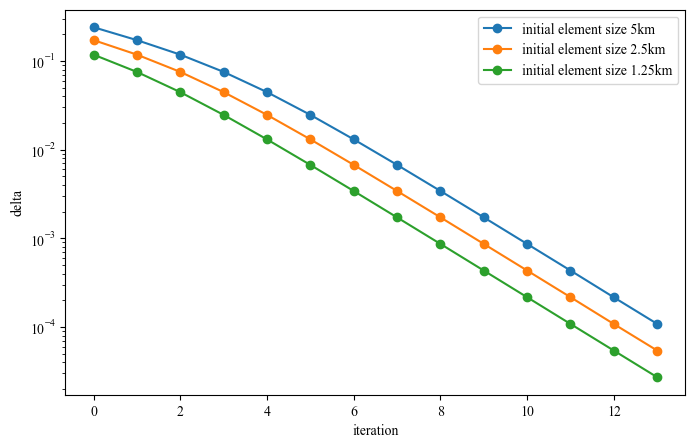

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros((nload, nobs*3))
    uobs_prev = np.zeros((nload, nobs*3))

    for iload in range(nload):
        filename = dir_ls[0] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
        uobs_prev[iload] = np.fromfile(filename, dtype=np.float64)
    for i in range(1, len(dir_ls)):
        for iload in range(nload):
            filename = dir_ls[i] + "displacement/" + str(iload + 1).zfill(4) + "_obs.bin"
            uobs[iload] = np.fromfile(filename, dtype=np.float64)
        delta = np.linalg.norm(uobs - uobs_prev) / np.linalg.norm(uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("delta")

In [56]:
obs_points.shape

(944, 3)

In [4]:
for iter in range(15):
    dat2500 = np.fromfile(dir_ls2[iter] + "displacement/0001_obs.bin", dtype=np.float64)
    dat1250 = np.fromfile(dir_ls3[iter] + "displacement/0001_obs.bin", dtype=np.float64)
    print(np.linalg.norm(dat2500 - dat1250) / np.linalg.norm(dat1250))
    print(np.argmax(np.abs(dat2500 - dat1250)))

0.2268956390088388
15
0.14355169521777747
15
0.08494209711229782
15
0.04725303125532929
15
0.024826405820846154
15
0.012375950229142407
15
0.00593617010036712
2658
0.0030541031484422505
2658
0.002307903997190009
2658
0.002378611509911325
2658
0.0025333916698546113
2658
0.0026360835937418842
1349
0.0026929548152177948
1349
0.00272258389004536
1349
0.0027377588333779767
1349


observed point:  [120000.  70000. 170000.]
5.313318034097506e-17
4.489423931857871e-17
4.005832118973195e-17
3.714810121342763e-17
3.5435265792692413e-17
3.4472040496778066e-17
3.396716700630525e-17
3.3694030516328747e-17
3.3554375500096176e-17
3.348372811235801e-17
3.344818123964905e-17
3.3430361441600304e-17
3.34214351504168e-17
3.3416975464148326e-17
3.341474089810924e-17
-----
4.486906331042169e-17
4.003719445028913e-17
3.712628192643688e-17
3.541238208800633e-17
3.4445190718738524e-17
3.3922744812589874e-17
3.3649876188342237e-17
3.351020451093059e-17
3.343954934795091e-17
3.340399477703587e-17
3.3386167594966187e-17
3.337724105205609e-17
3.3372775729005357e-17
3.337054699114473e-17
3.336943000502872e-17
-----
4.011155894873789e-17
3.7200070840705404e-17
3.548623174263724e-17
3.451882161091239e-17
3.399651658045486e-17
3.3723700263969846e-17
3.358404107067724e-17
3.3513359445894936e-17
3.3477811324873966e-17
3.345997759920879e-17
3.3451051717460793e-17
3.344658649844772e-17
3.3444

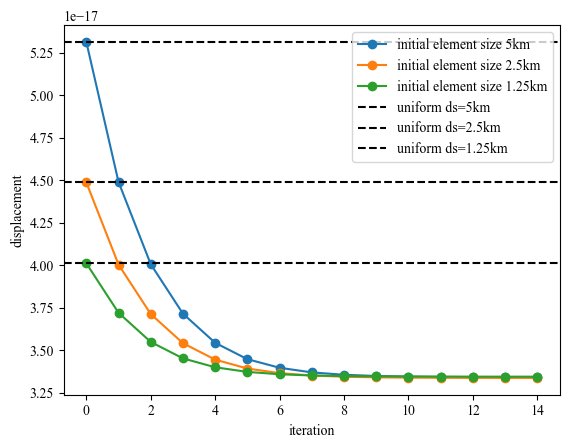

In [12]:
uindex = 1347
print("observed point: ", obs_points[uindex//3])
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nobs*3)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "displacement/0001_obs.bin"
        tmp = np.fromfile(filename, dtype=np.float64)
        uobs[:tmp.shape[0]] = tmp
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")
dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_5000_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=5km")
dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_2500_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=2.5km")
dat = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)
ax.axhline(dat[uindex], color="black", linestyle="--", label="uniform ds=1.25km")
ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

214687
247471
346426
391959
489894
637162
-----
1217249
1297878
1424231
1565474
1762362
1817672
-----
6984017
7160432
7347010
7444275
8135443
8224694
-----
37351081
37980466
38292482
38496597
39155597
39314945
-----


[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

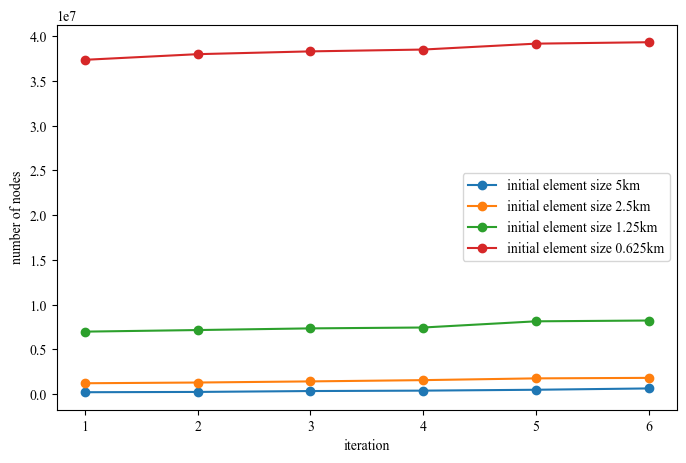

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    nnode_plt = []
    for dir in dir_ls:
        filename = dir + "data/setting.dat"
        with open(filename, "r") as f:
            f.readline()
            nnode = int(f.readline())
            print(nnode)
            nnode_plt.append(nnode) 
    ax.plot(list(range(1, len(dir_ls) + 1)), nnode_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.legend(loc='best')
ax.set_xlabel("iteration")
ax.set_ylabel("number of nodes")
ax.set_xticks(list(range(1, len(dir_ls) + 1)))
ax.set_xticklabels(list(range(1, len(dir_ls) + 1)))


0.19275320161159945
0.08685589646262348
0.08166757790720522
0.08235575177636878
0.05705186489421639
0.033744081671392014
0.017979178323360427
0.009402983435976254
-----
0.08078206351010557
0.08045731548141245
0.08194693449128129
0.05738300916391566
0.0334165904039588
0.017995081045647246
0.009408950202030746
0.00479773328983117
0.0024261240146315603
0.0012183038724357376
0.000610804252535246
0.00030571187836471897
0.0001522583777333422
7.653797310225936e-05
-----
0.08231549475220852
0.08111678555797378
0.056978700982896736
0.033326122727172294
0.01805098585439871
0.009395905526868881
0.004796978057632646
0.00242286421780531
0.0012186795860746969
-----


Text(0, 0.5, 'delta')

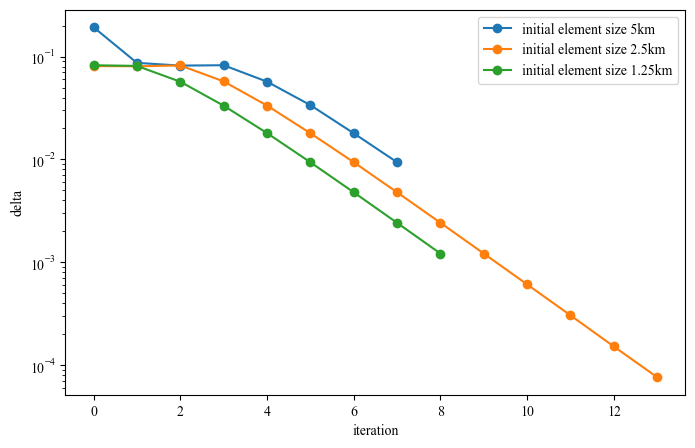

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    delta_plt = []
    uobs = np.zeros(nload)
    uobs_prev = np.loadtxt(dir_ls[0] + "data/greens_function.dat")

    for i in range(1, len(dir_ls)):
        uobs = np.loadtxt(dir_ls[i] + "data/greens_function.dat")
        delta = np.linalg.norm(uobs - uobs_prev) / np.linalg.norm(uobs_prev)
        print(delta)
        delta_plt.append(delta)
        uobs_prev = uobs.copy()
    ax.plot(delta_plt, marker="o", label=label_ls[isetting])
    print("-----")
ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel("iteration")
ax.set_ylabel("delta")

In [48]:
obs_points.shape

(944, 3)

0 0.2577700283445937
1 0.14109180253474243
2 0.15517988373207922
3 0.13420503069185533
4 0.08788332972558159
5 0.050078856891529085
6 0.02627888418995296
7 0.013299759884021767
8 0.0067820964401942106
9 0.0040573684166431275
10 0.0033572042515384345
11 0.00333955096039854
12 0.00342322287301244
13 0.003487092257706847
14 0.0035240082737652153


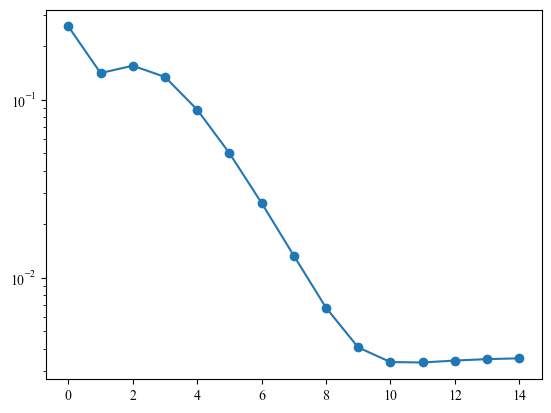

In [61]:
eplt = []
for iter in range(15):
    uobs5000 = np.loadtxt(dir_ls1[iter] + "data/greens_function.dat")
    uobs1250 = np.loadtxt(dir_ls3[iter] + "data/greens_function.dat")
    print(iter, np.linalg.norm(uobs5000 - uobs1250) / np.linalg.norm(uobs5000))
    eplt.append(np.linalg.norm(uobs5000 - uobs1250) / np.linalg.norm(uobs5000))
fig, ax = plt.subplots()
ax.plot(eplt, marker="o")
ax.set_yscale("log")

In [6]:
obs_points.shape

(944, 3)

0.0004708042134695602
0.0005348804229201177
0.0005012127664982989
0.0004375276415445034
0.0003877073627983525
0.0003591661758287905
0.0003436898773021654
0.000336424858387411
0.0003324182783193843
0.0003304004231631203
0.0003293868484105831
0.000328879222437476
0.0003286252297031806
0.0003284983759369731
0.0003284349704463287
-----
0.0005346870827632674
0.0005038738794372936
0.0004373481628411863
0.0003878876775614028
0.0003593601603881938
0.0003439962510363147
0.0003361221117430974
0.0003321121323042919
0.0003300928201161765
0.000329078404481985
0.0003285705742227468
0.000328316273561792
0.0003281891432301232
0.0003281257625220684
0.0003280939497471189
-----
0.0005016334575216623
0.0004381655902285795
0.0003888572535833423
0.0003599162284209255
0.000345015014805178
0.0003370984830517711
0.0003330813063496429
0.0003310566575113432
0.0003300405439015524
0.0003295312543432864
0.0003292765109410499
0.0003291490574928758
0.0003290853524056953
0.0003290534901085684
0.0003290375567757095
---

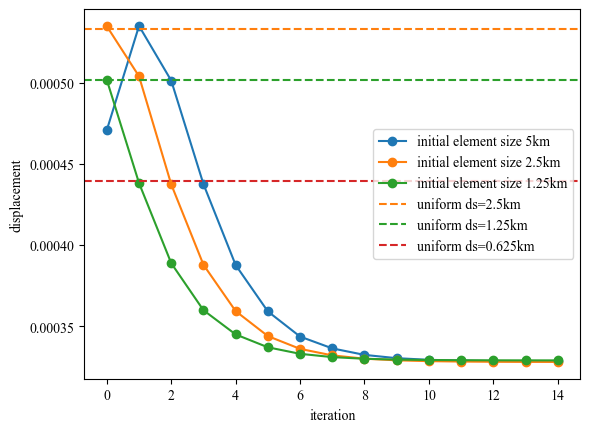

In [9]:
uindex = 0
# print("observed point: ", obs_points[uindex//3])
fig, ax = plt.subplots()
for isetting in range(len(dir_ls_arr)):
    dir_ls = dir_ls_arr[isetting]
    uobs = np.zeros(nload)
    uobs_plt = []
    for dir in dir_ls:
        filename = dir + "data/greens_function.dat"
        uobs = np.loadtxt(filename)
        uobs_plt.append(uobs[uindex])
        print(uobs[uindex])
    ax.plot(uobs_plt, marker="o", label=label_ls[isetting])
    print("-----")

# dat_tmp = np.loadtxt("/data4/nakao/AdaptiveFEM/work/work_5000_uniform_gflib/data/greens_function.dat")
# dat = dat_tmp.copy()
# ax.axhline(y=dat[uindex], c="tab:blue",linestyle='--', label='uniform ds=5.0km')

dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_2500_uniform/displacement/0001_obs.bin", dtype=np.float64)
dat = []
for i in range(0, dat_tmp.shape[0]//9):
    dat.append(dat_tmp[9*i])
    dat.append(dat_tmp[9*i+1])
    dat.append(dat_tmp[9*i+2])
dat = np.array(dat)
ax.axhline(y=dat[uindex], c="tab:orange",linestyle='--', label='uniform ds=2.5km')

dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_uniform/displacement/0001_obs.bin", dtype=np.float64)
dat = []
for i in range(0, dat_tmp.shape[0]//9):
    dat.append(dat_tmp[9*i])
    dat.append(dat_tmp[9*i+1])
    dat.append(dat_tmp[9*i+2])
dat = np.array(dat)
ax.axhline(y=dat[uindex], c="tab:green", linestyle='--', label='uniform ds=1.25km')

dat_tmp = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_625_uniform/displacement/0001_obs.bin", dtype=np.float64)
dat = []
for i in range(0, dat_tmp.shape[0]//9):
    dat.append(dat_tmp[9*i])
    dat.append(dat_tmp[9*i+1])
    dat.append(dat_tmp[9*i+2])
dat = np.array(dat)
ax.axhline(y=dat[uindex], c="tab:red", linestyle='--', label='uniform ds=0.625km')

ax.set_xlabel("iteration")
ax.set_ylabel("displacement")
ax.legend()

In [46]:
for iter in range(12):
    uobs5000 = np.fromfile(dir_ls1[iter+1] + "displacement/0001_obs.bin", dtype=np.float64)
    uobs1250 = np.fromfile(dir_ls3[iter+1] + "displacement/0001_obs.bin", dtype=np.float64)
    print(np.linalg.norm(uobs5000 - uobs1250) / np.linalg.norm(uobs1250))


0.39977808061448217
0.24051899853224093
0.13733803395614758
0.07477926420836727
0.03906594202278143
0.019704918375982785
0.009629411117487274
0.004650703601956376
0.002544709179756496
0.0020381995922581857
0.0020803745926746588
0.002179715284763617


In [29]:
uobs_init = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_1/displacement/0001_obs.bin", dtype=np.float64)
uobs_final = np.fromfile("/data4/nakao/AdaptiveFEM/work/work_1250_uniform_gflib/displacement/0001_obs.bin", dtype=np.float64)